In [265]:
import torch
from torch import nn
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import copy

In [266]:
DATA_PATH = '/Users/kuba/Documents/data/pt_ekyn_robust_50hz'

X = torch.load(DATA_PATH+'/A1-0_PF.pt')

In [267]:
X3, y3 = torch.load(DATA_PATH+'/A4-0_PF.pt')

In [268]:
X, y = X

In [269]:
X.shape

torch.Size([8640, 1000])

In [270]:
X_1_3 = torch.vstack([X, X3])
y_1_3 = torch.vstack([y, y3])


In [271]:
perm = torch.randperm(len(X_1_3))
X_1_3 =  X_1_3[perm]
y_1_3 = y_1_3[perm]

In [272]:
X.flatten()

tensor([ 0.0696,  0.0714,  0.0797,  ..., -0.0622,  0.1562, -0.1081])

In [273]:
y

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

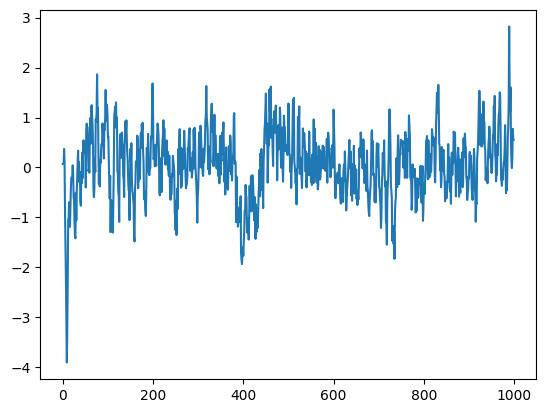

In [274]:
plt.plot(X[0])

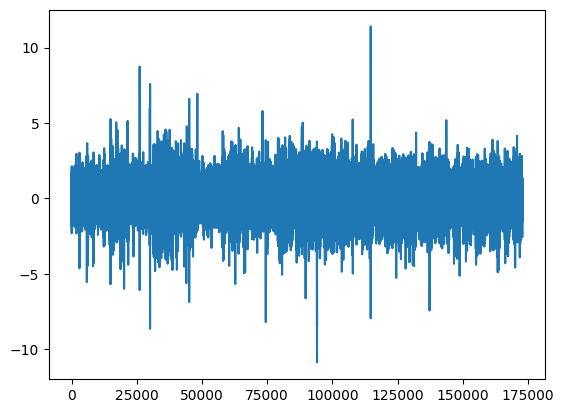

In [275]:
plt.plot(X.flatten()[::50])

In [276]:
y.shape

torch.Size([8640, 3])

In [277]:
y.argmax(axis=1).numpy().repeat(1000)

array([2, 2, 2, ..., 2, 2, 2])

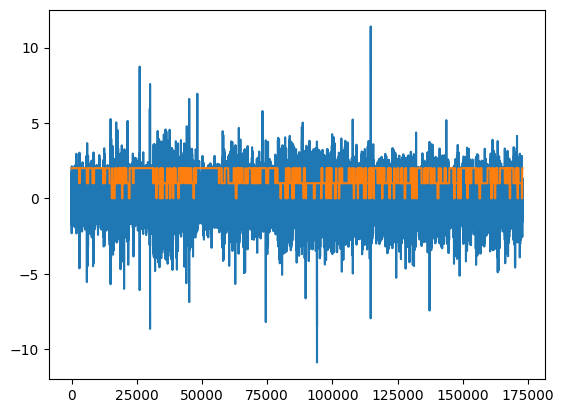

In [278]:
plt.plot(X.flatten()[::50])
plt.plot(y.argmax(axis=1).numpy().repeat(1000)[::50])


In [279]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.l0 = nn.Linear(1000, 512)
        self.relu0 = nn.ReLU()
        self.l1 = nn.Linear(512, 256)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(128, 32)
        self.relu3 = nn.ReLU()
        self.l4 = nn.Linear(32, 3)

    def forward(self, X):
        x = self.l0(X)
        x = self.relu0(x)
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.l3(x)
        x = self.relu3(x)
        logits = self.l4(x)
        return logits

    
model = MLP()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [280]:
rat_2 = torch.load(DATA_PATH+'/A1-1_PF.pt')
X2, y2 = rat_2

In [281]:
#loss = criterion(logits, y2)

In [282]:
#loss

In [283]:
# lossi = []
# devlossi = []


# for epochs in tqdm(range(100)):
#     #train step
#     logits = model.forward(X)
    
#     loss = criterion(logits, y)
#     optimizer.zero_grad()

#     loss.backward()
#     lossi.append(loss.item())

#     optimizer.step()

#     #dev step
#     with torch.no_grad():
#         devlogits = model.forward(X2)
#         devloss = criterion(devlogits, y2)
#         devlossi.append(devloss)


# plt.plot(lossi)
# plt.plot(devlossi)

100%|██████████| 40/40 [00:03<00:00, 10.25it/s]


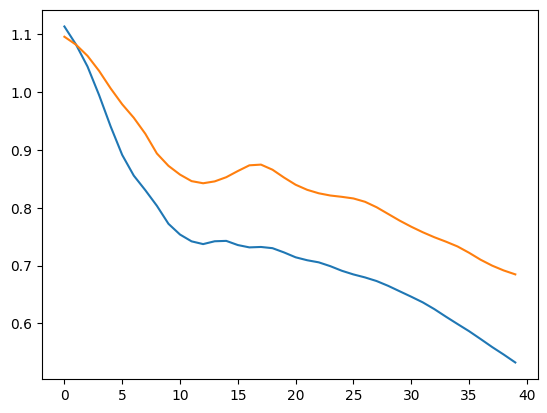

In [284]:
lossi = []
devlossi = []
bestdevloss = float('inf')

for epochs in tqdm(range(40)):
    #train step
    logits = model.forward(X_1_3)
    
    loss = criterion(logits, y_1_3)
    optimizer.zero_grad()

    loss.backward()
    lossi.append(loss.item())

    optimizer.step()

    #dev step
    with torch.no_grad():
        devlogits = model.forward(X2)
        devloss = criterion(devlogits, y2)
        devlossi.append(devloss)
        if devloss < bestdevloss:
            bestmodel = copy.deepcopy(model)


plt.plot(lossi)
plt.plot(devlossi)

In [289]:
bestmodel == model

False

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       537
           1       0.66      0.86      0.74      3914
           2       0.79      0.67      0.73      4189

    accuracy                           0.71      8640
   macro avg       0.48      0.51      0.49      8640
weighted avg       0.68      0.71      0.69      8640



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

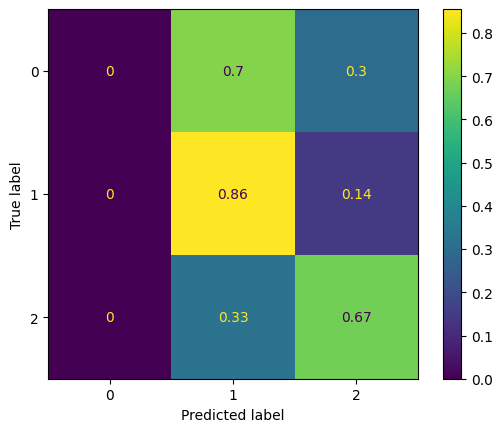

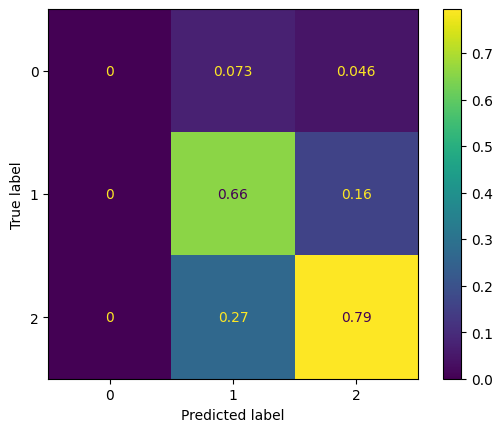

In [288]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

logits = bestmodel.forward(X2)
y_pred = (logits).argmax(axis=1)
y_true = y2.argmax(axis=1)

ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, normalize='true')

ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, normalize='pred')

y_rand = torch.randint(0,3,(8640,1))

print(classification_report(y_true=y_true, y_pred=y_pred))

In [287]:
print(classification_report(y_true=y_true, y_pred=y_rand))


              precision    recall  f1-score   support

           0       0.06      0.31      0.10       537
           1       0.44      0.32      0.37      3914
           2       0.47      0.33      0.39      4189

    accuracy                           0.32      8640
   macro avg       0.32      0.32      0.29      8640
weighted avg       0.43      0.32      0.36      8640

